# 4.3 Spatial Resection: Estimating Camera Extrinsics Using P3P

In this exercise, you have to implement Projective 3-Point (P3P) algorithm (also called as spatial resection) to estimate the camera extrinsics.  

## 4.1.0 Data: 3D Cube with checkerboard pattern

We use the same 3D cube with a checkerboard pattern as used in ex 3.1  to get the correspondences between the 3D points on the cube and 2D points in the image. As before, the origin of the coordinates is at the nearest corner of the cube with respect to the current view as depicted below. The axes are aligned along the edges of the cube with X-axis, Y-axis and Z-axis shown in red, blue and green respectively. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ex4_3 as ex

%matplotlib inline

# load the input image
I = plt.imread('data/checkerboard_cube/cube_origin.png')
plt.imshow(I)
plt.show()

## 4.3.1 Get 3D-2D correspondences [2.5]

Again, similar to ex 3.1, choose a set of 3D points $X$ on the cube (control points) and find the corresponding points in the image by clicking. Choose 4 (non-degenerate) correspondences necessary to compute (3 correspondences for P3P) and identify the correct solution (1 correspondence). Visualize the clicked points by drawing over the image. 

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np 


# load the input image
I = plt.imread('data/checkerboard_cube/cube0.jpg')
plt.imshow(I, cmap = 'gray')

# Compute 3D-2D correspondence
# TO DO: Define 3D control points (4 Points)
X = [[0, 0, 0],
     [7, 0, 0],
     [7, 0, 7],
     [7, 7, 7]]
print("3D points: \n", X)

# TODO: Get corresponding points from user by clicking
x = np.array(plt.ginput(len(X)))
new_order = [1, 0] # Switch x & y axis st normal from image plane is towards camera origin
x = x[:, new_order]
print("\n Corresponding image coordinates: \n", x)

plt.plot(x[:, 1], x[:, 0], 'rx')
plt.show()

In [ ]:
import numpy as np

In [ ]:
# Save x to np array, for later load
# x = np.array([[489.69006223, 307.0092151 ],
#  [453.03577044, 565.74539245],
#  [222.32934563, 634.74170641],
#  [ 61.33794639, 482.37484642]])
# print("\n Corresponding image coordinates: \n", x)
# np.save('4_points_ex4_3.npy', x)
# print('Data saved !')

In [3]:
# Load cell for next time
x = np.load('4_points_ex4_3.npy')

# Load real 3D points
X = np.array([[0, 0, 0],
     [7, 0, 0],
     [7, 0, 7],
     [7, 7, 7]])

## 4.3.2 Spatial Resection [7.5]

Implement P3P algorithm to estimate extrinsics by completing the function `spatial_resection`. The function takes as input 4 3D-2D correspondences, the camera intrisics $K$ and computes the extrinsics $R, X_0$. Print the estimated extrinsics and compare it the solution obtained in ex 3.1. Use the camera intrinsics K as given below (or your estimate from ex 3.1 or ex 3.2).

** Hints **
- Compute the angles $\alpha, \beta$ and $\gamma$ and the distances $s_1, s_2, s_3, s_4$.
- Identify the correct solution using the 4th point
- Compute the coordinate transformation to obtain $R$ and $X_0$ 

In [4]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import ex4_3 as ex


In [5]:
# Camera intrinsics, modify from negative to positive. Reason: when I display this in the 3D vector, the orien of 3 vectors seem not true in the real case
# TODO: MUST INSPECT MORE !!!!
# Use the K from DLT to improve

# [[-1.23279139e+03  1.58094297e+01  3.26420413e+02]
#  [-0.00000000e+00 -1.23240886e+03  4.00489503e+02]
#  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

K = [[1.23279139e+03, 1.58094297e+01, 3.26420413e+02], 
    [0, 1.23240886e+03, 4.00489503e+02],
    [0, 0, 1]]
K = np.array(K, dtype=np.float)

# Compute extrinsics using P3P
lbd, R, X0 = ex.spatial_resection(x, X, K)

print('Extrinsics: \n R = \n', R, '\n Lambda = \n', lbd,' \n X0 = \n', X0)

Vec = [ 0.13341172 -0.07585168  1.        ]
Vec = [0.10098663 0.13409177 1.        ]
Vec = [-0.08687283  0.1900767   1.        ]
Vec = [-0.21587829  0.06644333  1.        ]
Unit vectors: 
 [[-0.13186787  0.07497392 -0.98842793]
 [-0.09959316 -0.13224151 -0.98620149]
 [ 0.08503566 -0.186057   -0.97885225]
 [ 0.21057357 -0.06481063 -0.97542727]]
Angle list: 
 [0.21011193 0.34117547 0.19275063]
Distance list: 
 [7.         9.89949494 7.        ]
a = 7.0, b = 9.899494936611665, c = 7.0
Alpha = 0.19275063165566553, Beta = 0.341175470093924, Gamma = 0.21011192994153705
All triplets: 
[[28.86875645 32.99259149 29.37209817]
 [28.86875645 24.66372341 29.37209817]
 [29.55280592 32.22061506 28.32173316]
 [29.55280592 23.37387314 28.32173316]]
X_i = 
 [[ -3.80686147   2.16440394 -28.53468522]
 [ -2.45633818  -3.26156795 -24.32340086]
 [  2.49767578  -5.4648845  -28.7509444 ]]
Extrinsics: 
 R = 
 [[ 0.1929319  -0.77513884  0.60161205]
 [ 0.67964325  0.54780127  0.48785123]
 [ 0.70771628 -0.31475951

## Test the computed values


In [6]:
# x = KR[I|-X0]X
X0_ = -X0[:, np.newaxis]
I_X0 = np.concatenate((np.eye(3), X0_), axis=1)
print(I_X0)

[[  1.           0.           0.         -19.57898905]
 [  0.           1.           0.         -15.32232574]
 [  0.           0.           1.          14.67292134]]


In [7]:
P = lbd * K @ R.T @ I_X0
print(f'Projection matrix: \n {P}')

Projection matrix: 
 [[ 4.21968733e+02  1.00576337e+03  6.61027428e+02 -1.39731518e+04]
 [-7.14348665e+02  8.70494433e+02 -6.41224507e+02 -8.76041131e+03]
 [ 6.01612050e-01  4.87851229e-01 -6.32506220e-01 -2.85346852e+01]]


In [11]:
print(f'R_T: \n {R.T}')

R_T: 
 [[ 0.1929319   0.67964325  0.70771628]
 [-0.77513884  0.54780127 -0.31475951]
 [ 0.60161205  0.48785123 -0.63250622]]



 Reprojected image coordinates 1: 
 [220.09171316 243.58870209   1.        ]

 Reprojected image coordinates 2: 
 [138.90987476 407.79484154   1.        ]

 Reprojected image coordinates 3: 
 [343.92273489 460.30120832   1.        ]


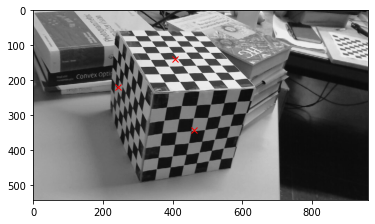

In [10]:
# generate homogeneous 3D points
P_1 = np.array([0., 5., 4., 1.])
P_2 = np.array([3., 4., 7., 1.])
P_3 = np.array([3., 0., 4., 1.])


# Compute reprojection error

x_hat_1 = P @ P_1
x_hat_1 = x_hat_1 / x_hat_1[-1]

x_hat_2 = P @ P_2
x_hat_2 = x_hat_2 / x_hat_2[-1]

x_hat_3 = P @ P_3
x_hat_3 = x_hat_3 / x_hat_3[-1]

print("\n Reprojected image coordinates 1: \n", x_hat_1)
print("\n Reprojected image coordinates 2: \n", x_hat_2)
print("\n Reprojected image coordinates 3: \n", x_hat_3)


x_hat = np.stack((x_hat_1, x_hat_2, x_hat_3))
# err_reproj = None
# print("\n The reprojection error: ", err_reproj)

# Visualize observed and reprojected points
I = plt.imread('data/checkerboard_cube/cube0.jpg')
plt.imshow(I, cmap = 'gray')
plt.plot(x_hat[:, 1], x_hat[:, 0], 'rx')
plt.show()

## Conclusion

* Need more research about the sign of the focal, due to this sign, my implementation seems not stable.
* Due to the choose of f, then the sign of the Rotation matrix seem inverse compared to the DLT method, and the value is quite different !!!
* These params are not perfect when we choose point like (7,7,7), but overall it can acceptable